[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zahid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Zahid\AppData\Local\Temp\ipykernel_4668\546743629.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='viridis')


Dataset Size: (5572, 2)

Class Distribution:
 ham     4825
spam     747
Name: label, dtype: int64


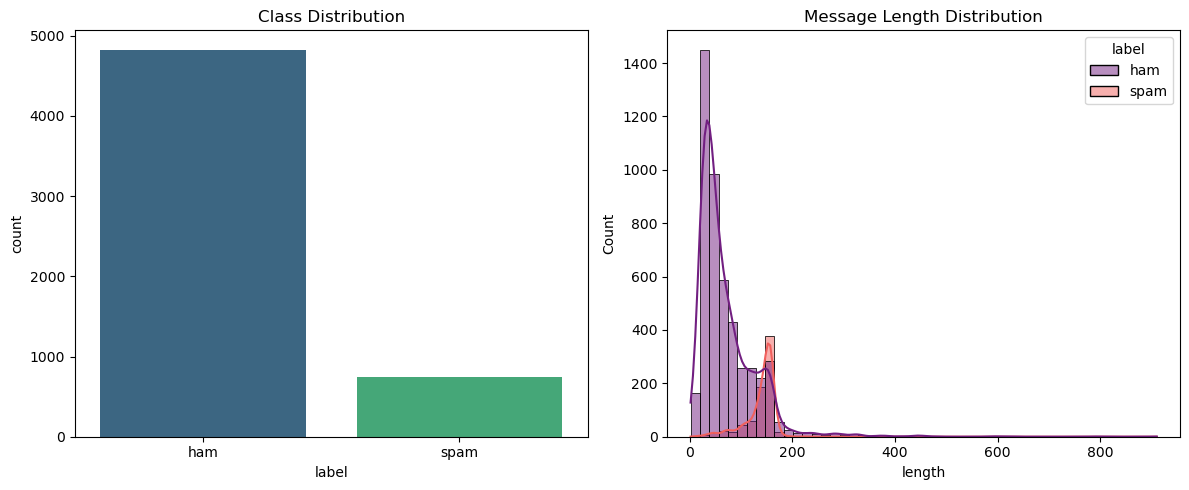

Accuracy: 0.9722


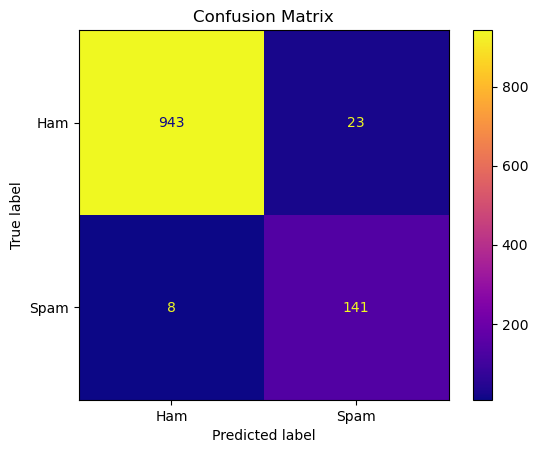

Spam


In [4]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv("SMSSpamCollection", sep="\t", header=None, names=["label", "message"])

# Step 1: Basic EDA
print("Dataset Size:", df.shape)
print("\nClass Distribution:\n", df['label'].value_counts())

# Add message length column
df['length'] = df['message'].apply(len)

# Plot class distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='label', palette='viridis')
plt.title("Class Distribution")

# Plot message length
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='length', hue='label', bins=50, kde=True, palette='magma')
plt.title("Message Length Distribution")
plt.tight_layout()
plt.show()

# Step 2: Preprocess Text
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation/numbers
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_message'] = df['message'].apply(preprocess_text)

# Step 3: Vectorize text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_message'])

# Encode labels
y = df['label'].map({'ham': 0, 'spam': 1})

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Step 4: Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='plasma')
plt.title("Confusion Matrix")
plt.show()

def predict_spam(message):
    cleaned = preprocess_text(message)
    vect = vectorizer.transform([cleaned])
    pred = model.predict(vect)[0]
    return "Spam" if pred == 1 else "Ham"

# Example usage
print(predict_spam("Congratulations! You've won a free iPhone. Call now!"))